Shape of the dataset is  (40949, 16)
After deleting Duplicate rows Shape of the dataset is  (40901, 16)
        category_id         views         likes      dislikes  comment_count
count  40901.000000  4.090100e+04  4.090100e+04  4.090100e+04   4.090100e+04
mean      19.970588  2.360678e+06  7.427173e+04  3.711722e+03   8.448567e+03
std        7.569362  7.397719e+06  2.289999e+05  2.904624e+04   3.745139e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.419720e+05  5.416000e+03  2.020000e+02   6.130000e+02
50%       24.000000  6.810640e+05  1.806900e+04  6.300000e+02   1.855000e+03
75%       25.000000  1.821926e+06  5.533800e+04  1.936000e+03   5.752000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06
<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  --

C:\Users\garvi\AppData\Local\Temp\ipykernel_15604\1448483842.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Film and Animation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['category_id']==1,'category_name']='Film and Animation'


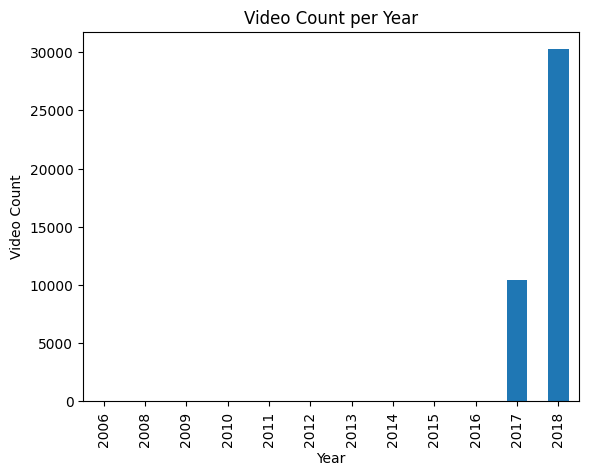

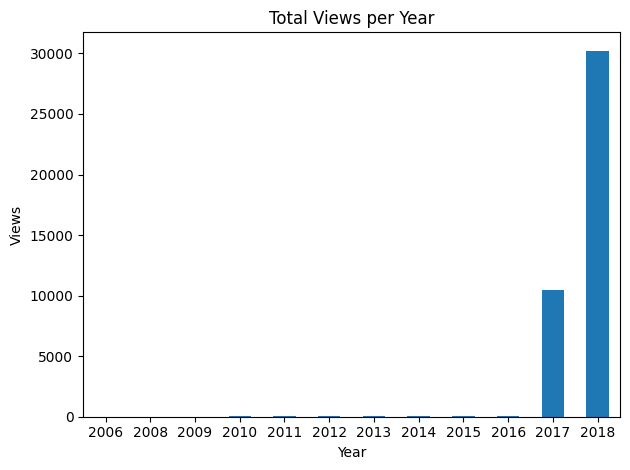

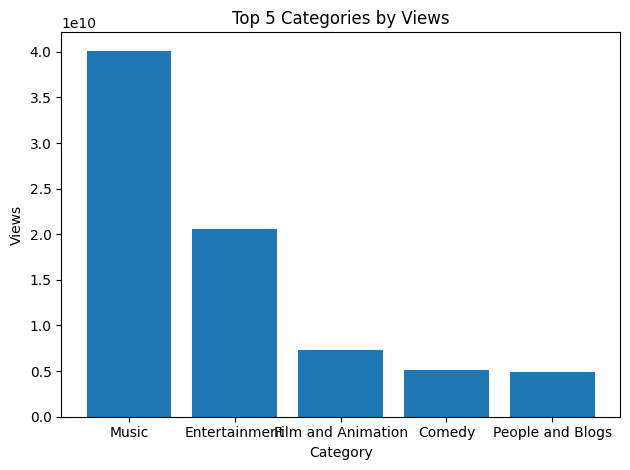

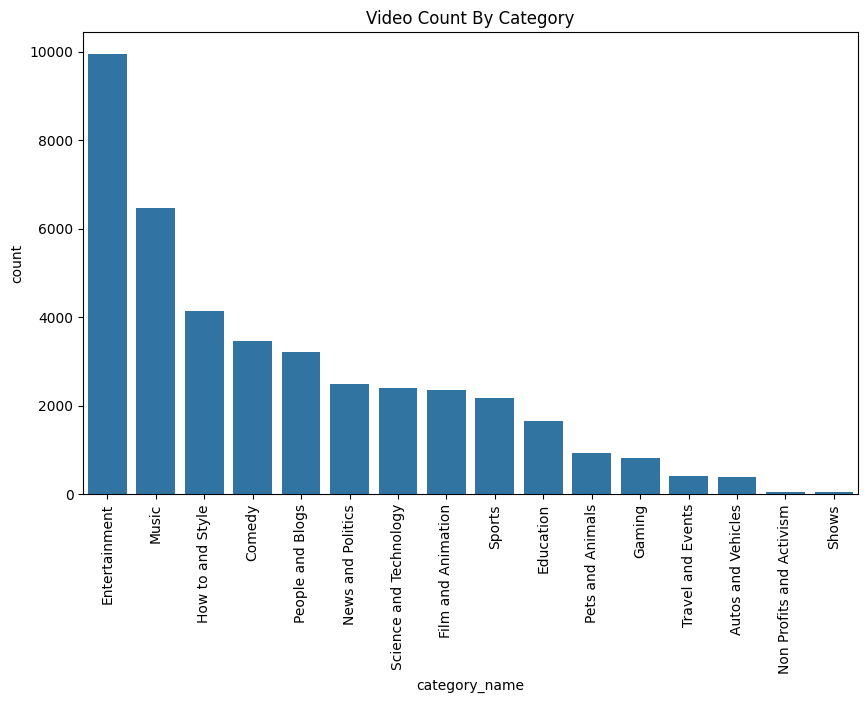

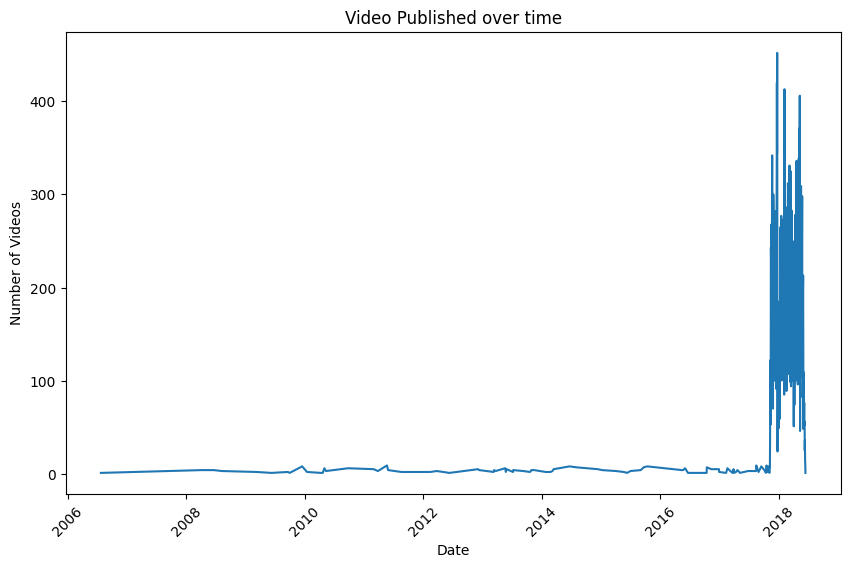

C:\Users\garvi\AppData\Local\Temp\ipykernel_15604\1448483842.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=video_per_hour.index,y=video_per_hour.values,palette='rocket')


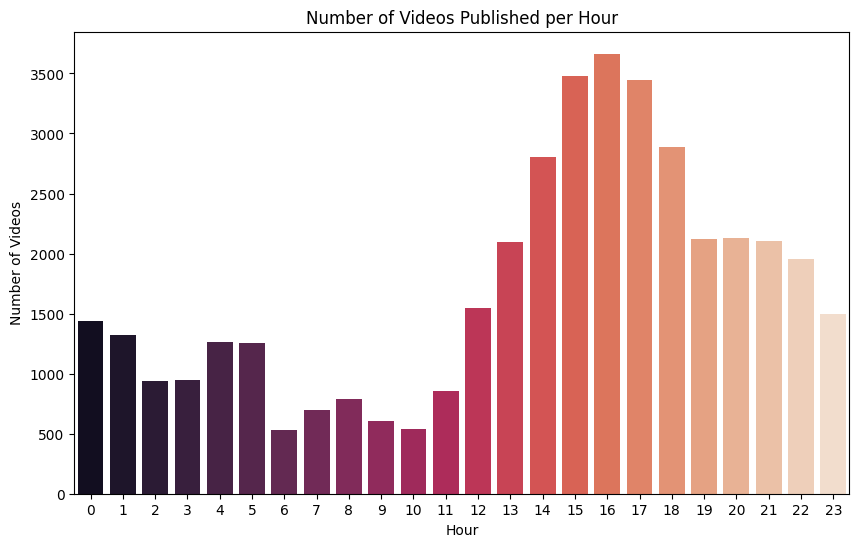

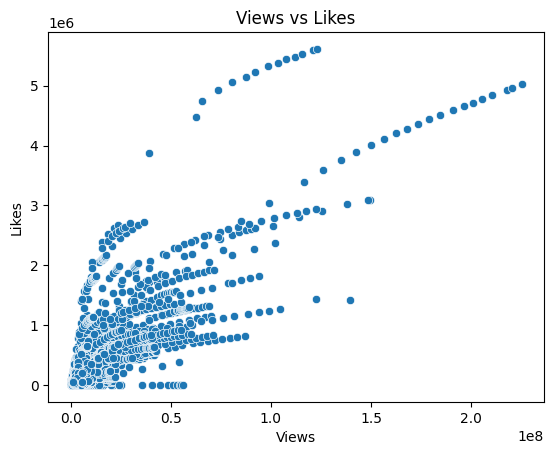

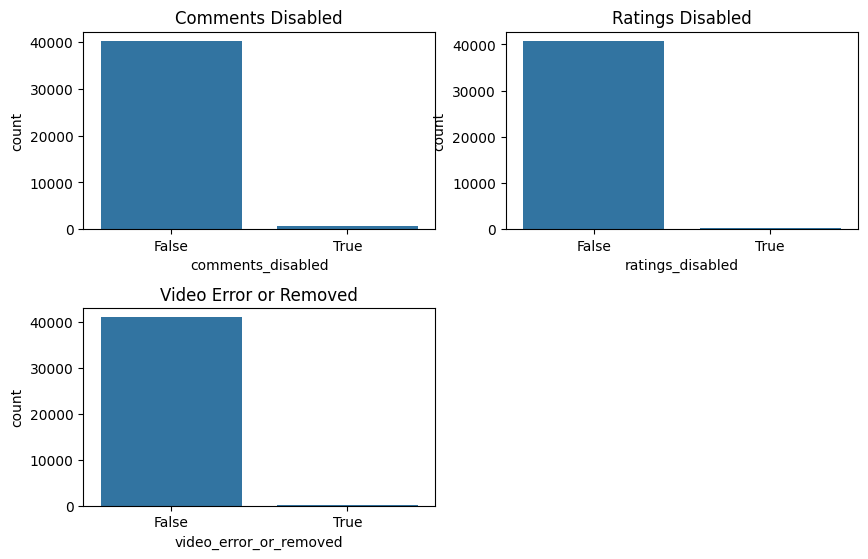

np.float64(0.8491785476230503)

In [2]:
'''
Description:
This task involves performing exploratory
data analysis on a dataset.
Responsibility:
Create visualizations to understand the
distribution of variables, identify outliers,
and check for correlations between
variables.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df=pd.read_csv('USvideos.csv')
# print(df.head())
print("Shape of the dataset is ",df.shape)
#  dropping duplicate rows
df=df.drop_duplicates()
print("After deleting Duplicate rows Shape of the dataset is ",df.shape)
# Descriptive Statistics
print(df.describe())

#Printing Information of dataset
print(df.info())

#Dropping thumbnail_link and description as they contains links
remove_column=['thumbnail_link','description']
df=df.drop(columns=remove_column)
print("After Dropping two columns ",df.shape)

#Formating Date
df['trending_date']=df['trending_date'].apply(lambda x :datetime.strptime(x,'%y.%d.%m'))
print(df.head())

df['publish_time']=pd.to_datetime(df['publish_time'])
print(df.head())

#Adding new columns
df['publish_month']=df['publish_time'].dt.month
df['publish_day']=df['publish_time'].dt.day
df['publish_hour']=df['publish_time'].dt.hour

#Sorting cat ids
print(sorted(df['category_id'].unique()))

#Assigning categories names to categories ids
df['category_name']=np.nan
df.loc[df['category_id']==1,'category_name']='Film and Animation'
df.loc[df['category_id']==2,'category_name']='Autos and Vehicles'
df.loc[df['category_id']==10,'category_name']='Music'
df.loc[df['category_id']==15,'category_name']='Pets and Animals'
df.loc[df['category_id']==17,'category_name']='Sports'
df.loc[df['category_id']==19,'category_name']='Travel and Events'
df.loc[df['category_id']==20,'category_name']='Gaming'
df.loc[df['category_id']==22,'category_name']='People and Blogs'
df.loc[df['category_id']==23,'category_name']='Comedy'
df.loc[df['category_id']==24,'category_name']='Entertainment'
df.loc[df['category_id']==25,'category_name']='News and Politics'
df.loc[df['category_id']==26,'category_name']='How to and Style'
df.loc[df['category_id']==27,'category_name']='Education'
df.loc[df['category_id']==28,'category_name']='Science and Technology'
df.loc[df['category_id']==29,'category_name']='Non Profits and Activism'
df.loc[df['category_id']==30,'category_name']='Movies'
df.loc[df['category_id']==43,'category_name']='Shows'

df.head()

#Visualization
#Shwoing the Video published per year
df['year']=df['publish_time'].dt.year
yearly_counts=df.groupby('year')['video_id'].count()
#showing bar chart
yearly_counts.plot(kind='bar',xlabel='Year',ylabel='Video Count',title='Video Count per Year')
plt.show()

#Showing views per year
yearly_views=df.groupby('year')['views'].count()
#showing bar chart
yearly_views.plot(kind='bar',xlabel='Year',ylabel='Views',title='Total Views per Year')
plt.xticks(rotation=0)
plt.tight_layout() # it ensures that the graph should be in proper manner
plt.show()

#Shorting categories by views in desn order
category_views=df.groupby('category_name')['views'].sum().reset_index()
top_categories=category_views.sort_values(by='views',ascending=False).head(5)
#Ploting graph
plt.bar(top_categories['category_name'],top_categories['views'])
plt.xlabel('Category')
plt.ylabel('Views')
plt.title('Top 5 Categories by Views')
plt.tight_layout()
plt.show()

#Count plt
plt.figure(figsize=(10,6))
sns.countplot(x='category_name',data=df,order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Video Count By Category")
plt.show()


#Line graph
df['publish_time']=pd.to_datetime(df['publish_time'])
df['publish_date']=df['publish_time'].dt.date
video_count_by_date=df.groupby('publish_date').size()
plt.figure(figsize=(10,6))
sns.lineplot(data=video_count_by_date)
plt.title('Video Published over time')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()




#Bar graph for number of videos published per hour
video_per_hour=df['publish_hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=video_per_hour.index,y=video_per_hour.values,palette='rocket')
plt.title('Number of Videos Published per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Videos')
plt.show()

#Scatter plot
sns.scatterplot(x='views',y='likes',data=df)
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)
plt.subplot(2,2,1)
g=sns.countplot(x='comments_disabled',data=df)
g.set_title('Comments Disabled')
plt.subplot(2,2,2)
g1=sns.countplot(x='ratings_disabled',data=df)
g1.set_title('Ratings Disabled')
plt.subplot(2,2,3)
g2=sns.countplot(x='video_error_or_removed',data=df)
g2.set_title('Video Error or Removed')
plt.show()

#Co relation between views and likes
corr_matrix=df['views'].corr(df['likes'])
corr_matrix